In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

In [2]:
warnings.filterwarnings('ignore')

def setup_matplot(titlesize=int(14),labelsize=int(12)):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [10,8]
    plt.rcParams['figure.titlesize'] = titlesize
    plt.rcParams['figure.labelsize'] = labelsize
    return(plt)

plt = setup_matplot()

In [3]:
path = 'database/diabetes.csv'

df = pd.read_csv(f'{path}')

In [4]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df['Outcome']

In [5]:
features_names = list(X.columns)

features_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
X = X.to_numpy()
y = y.to_numpy()

In [7]:
random_state=1122

In [9]:
logistic = LogisticRegressionCV(random_state=2211)

logistic.fit(X,y)

LogisticRegressionCV(random_state=2211)

In [10]:
logistic.coef_

array([[ 0.10096014,  0.03479634, -0.01314834,  0.00272467, -0.00098841,
         0.08669304,  0.06184281,  0.01808477]])

In [11]:
importances = logistic.coef_[0]

logistic_importances = pd.Series(importances, index=features_names)

std = np.std(logistic.scores_[1], axis=0)

In [28]:
logistic_df = pd.DataFrame(logistic_importances).reset_index().rename(columns={'index':'Feature', 0:'Importancy'})

logistic_df.sort_values(by='Importancy', ascending=False, inplace=True)

logistic_df

,Feature,Importancy
0,Pregnancies,0.100960
5,BMI,0.086693
6,DiabetesPedigreeFunction,0.061843
1,Glucose,0.034796
7,Age,0.018085
3,SkinThickness,0.002725
4,Insulin,-0.000988
2,BloodPressure,-0.013148


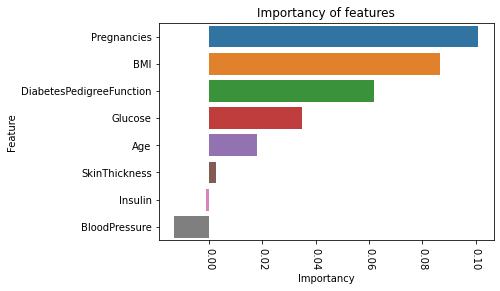

In [29]:
sns.barplot(data=logistic_df, y='Feature', x='Importancy')
plt.title('Importancy of features')
plt.xticks(rotation=270)
plt.show()